## Example for Module 2

This week, I am going to demonstrate a few additional code elements for you. First things first, let's get the initial code loaded. 


In [1]:
############################Initialization############################
RANDOM_SEED = 1 # seed value for random number generator             
import numpy as np
import pandas as pd

import seaborn as sns
import os #manage files
import matplotlib.pyplot as plt  #plots
from matplotlib import rc

import sklearn 
from sklearn.model_selection import train_test_split as tts
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from scipy import stats as st
import itertools
import tabulate
os.chdir('C:\\Users\\natha\\Desktop')
######################################################################

## Load and Look

Load the data and transform as necessary.

In [2]:
############################Read Data and Examine#####################
# initial work with the smaller data set
bank1 = pd.read_csv('bank.csv', sep = ';') 
bank = pd.get_dummies(bank1) #We can convert to dummies right up front.
print (bank1.dtypes)
######################################################################

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object


In [3]:
print(pd.DataFrame.head(bank1)) #Header

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome response  
0  cellular   19   oct        79         1     -1         0  unknown       no  
1  cellular   11   may       220         1    339         4  failure       no  
2  cellular   16   apr       185         1    330         1  failure       no  
3   unknown    3   jun       199         4     -1         0  unknown       no  
4   unknown    5   may       226         1     -1         0  unknown       no  


## Crosstabs and Numerics

We can run some crosstabs and describe our dataset.

In [4]:
#######################Some Crosstabs and Plot###########################
a=pd.crosstab(bank.response_yes, 
            bank.housing_yes, 
            rownames=['Response'], colnames=['Housing'])

b=pd.crosstab(bank.response_yes, 
            bank.loan_yes, 
            rownames=['Response'], colnames=['Loan'])

c=pd.crosstab(bank.response_yes, 
            bank.default_yes, 
            rownames=['Response'], colnames=['Default'])

print(a,"\n")
print(b,"\n")
print(c,"\n")

def myor(a):
        myv=round((a.loc[1,1]/a.loc[0,1])/(a.loc[1,0]/a.loc[0,0]),3)
        logmyv=np.log(myv)
        se=np.sqrt(1/(a.loc[1,1]+1/a.loc[0,1]+a.loc[1,0]+a.loc[0,0]))
        lower=round(np.exp(logmyv-1.96*se),3)
        upper=round(np.exp(logmyv+1.96*se),3)
        return [myv, lower, upper]


print('\033[1m',"Odds for Response Yes for Each Variable with 95% CI", '\033[0m')
print("If housing=yes, odds for response=yes:", myor(a))
print("If loan=yes, odds for response=yes:", myor(b))
print("If default=yes, odds for response=yes", myor(c))
#########################################################################

Housing      0     1
Response            
0         1661  2339
1          301   220 

Loan         0    1
Response           
0         3352  648
1          478   43 

Default      0   1
Response          
0         3933  67
1          512   9 

 Odds for Response Yes for Each Variable with 95% CI 
If housing=yes, odds for response=yes: [0.519, 0.498, 0.541]
If loan=yes, odds for response=yes: [0.465, 0.451, 0.48]
If default=yes, odds for response=yes [1.032, 1.002, 1.063]


In [5]:
bank.describe(include="all")

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,response_no,response_yes
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.105729,0.209246,0.037160,...,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509,0.884760,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.307524,0.406815,0.189174,...,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638,0.319347,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Plots
We look at the data

(array([4.111e+03, 3.400e+02, 4.700e+01, 1.700e+01, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313. ,  4137.1, 11587.2, 19037.3, 26487.4, 33937.5, 41387.6,
        48837.7, 56287.8, 63737.9, 71188. ]),
 <a list of 10 Patch objects>)

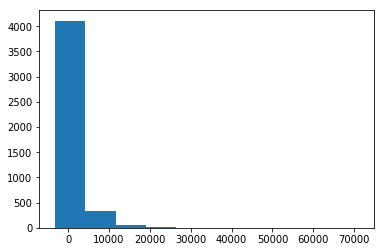

In [6]:
plt.hist(bank1.balance)

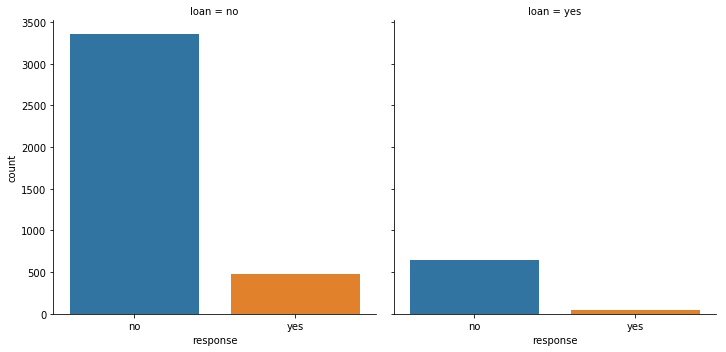

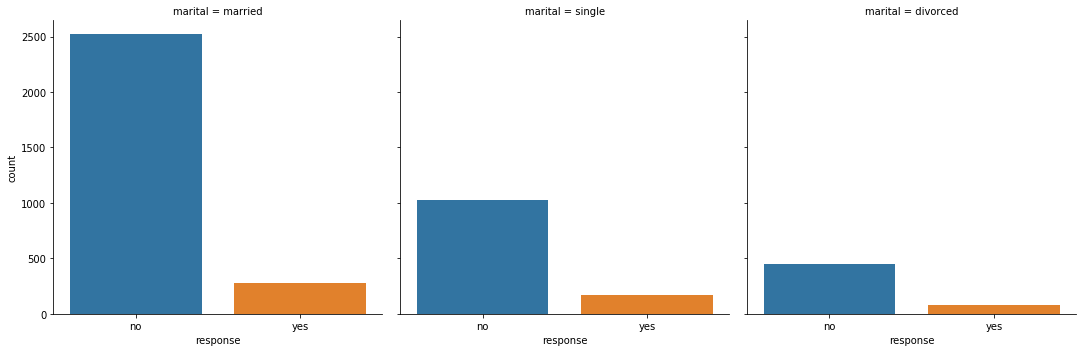

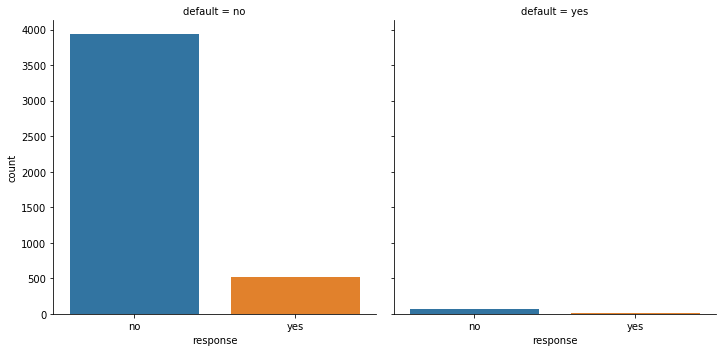

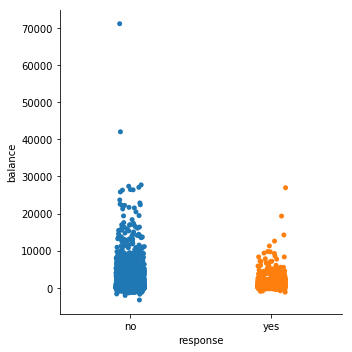

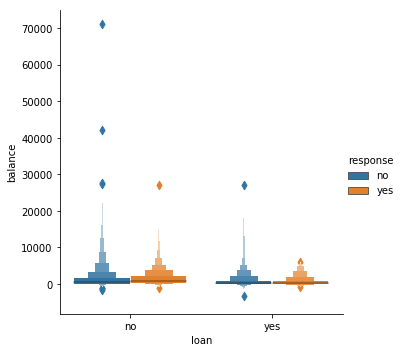

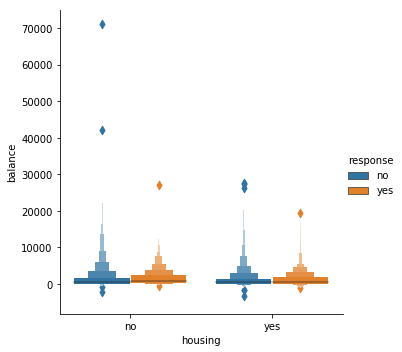

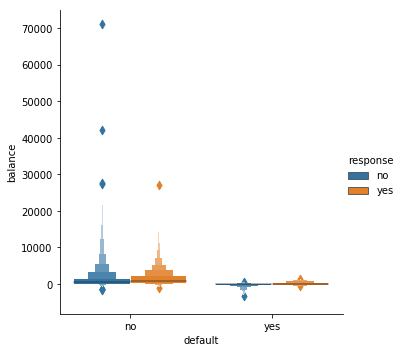

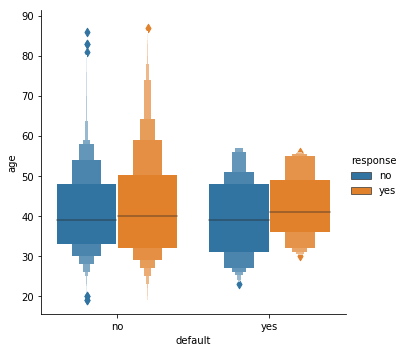

In [7]:
################Plot the Data#########################################
fig1=sns.catplot(x="response", col="loan", data=bank1, kind="count")
fig2=sns.catplot(x="response", col="marital", data=bank1, kind="count")
fig3=sns.catplot(x="response", col="default", data=bank1, kind="count")
fig4=sns.catplot(x="response", y="balance", data=bank1)
fig5=sns.catplot(x="loan", y="balance", hue="response", kind="boxen", data=bank1)
fig6=sns.catplot(x="housing", y="balance", hue="response", kind="boxen", data=bank1)
fig7=sns.catplot(x="default", y="balance", hue="response", kind="boxen", data=bank1)
fig8=sns.catplot(x="default", y="age", hue="response", kind="boxen", data=bank1)
######################################################################

# You could use train_test_split to split the data. 
This is probably the easiest way to start.

In [8]:
X,y=np.array(bank[['loan_yes', 'default_yes', 'housing_yes']]),np.array(bank['response_yes'])
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.3, random_state=42)
print("% defaults:", round(100*sum(y) / len(y),2))

% defaults: 11.52


# But What About Upsampling?
You have very few in the class of interest (default == 1).  You could upsample the training set to see if you could fit a better model.  

In [9]:
minority, majority=X_train[y_train==1], X_train[y_train==0] #bifurcate
oversample=len(majority)

#########Resample with Replacement###################################################
minority= resample(minority, replace=True, n_samples=oversample, random_state=123) 
#####################################################################################

#########Rebuild the training set with the upsampled data###########################
X_train1=np.concatenate((minority, majority))
a,b=np.repeat(1,oversample),np.repeat(0,len(majority)) 
y_train1=np.append(a, b)
print(sum(y_train1)/len(y_train1))
#####################################################################################

0.5


## Logistic Regression and Naive Bayes on the Training Set
Easy to do...use cross_val_score from model_selection

In [10]:
###Import Necessary Libraries
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import confusion_matrix as cm
from sklearn.naive_bayes import BernoulliNB as bern
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.model_selection import cross_val_score as cvs
from sklearn import metrics
nfolds=10

clf = lr(solver="lbfgs", multi_class="ovr") 
mycvs=cvs(clf,X_train1,y_train1,cv=nfolds)
print("Accuracy of LR: \n", mycvs)

Accuracy of LR: 
 [0.57678571 0.58035714 0.59285714 0.58571429 0.61964286 0.60573477
 0.58960573 0.59677419 0.62903226 0.58781362]


## Naive Bayes
Now, Naive Bayes


 Accuracy of NB: 
 [0.57678571 0.58035714 0.59285714 0.58571429 0.61964286 0.60573477
 0.58960573 0.59677419 0.62903226 0.58781362]


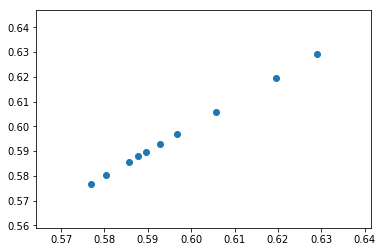

In [11]:
clf1=bern()
mycvs1=cvs(clf1, X_train1, y_train1, cv=nfolds)
print("\n Accuracy of NB: \n", mycvs1)


from matplotlib.pyplot import scatter
scatter(mycvs, mycvs1)

#The two models produce the same results as the training set size 
#approaches ∞ IF the Naive Bayes assumption holds that the xi’s are 
#conditionally independent of one another given y. 

## Now Fit the Full Training Set

Well, we can use the ROC, NPV, PPV, etc.

In [12]:
clf.fit(X_train1,y_train1)
mypred=clf.predict_proba(X_train1)
mypred = [p[1] for p in mypred]
mypredclass=clf.predict(X_train1)

clf1.fit(X_train1,y_train1)
mypred1=clf1.predict_proba(X_train1)
mypred1=[p[1] for p in mypred1]
mypredclass1=clf1.predict(X_train1)

def metrics(y,mypred):
    print("Area Under the Curve:", roc(y,mypred))
    myconfusion=cm(y,mypredclass)
    PPV=(myconfusion[1,1]/(myconfusion[1,0]+myconfusion[1,1]))
    NPV=(myconfusion[0,0]/(myconfusion[0,0]+myconfusion[0,1]))
    print("\n Confusion Matrix: \n",myconfusion)
    print("\n PPV, Correctly Classifies Response Yes: \n", PPV)
    print("\n NPV, Correctly Classifies Response No: \n", NPV)
    
metrics(y_train1,mypred)
metrics(y_train1,mypred1)

Area Under the Curve: 0.5985032689987552

 Confusion Matrix: 
 [[1801  994]
 [1253 1542]]

 PPV, Correctly Classifies Response Yes: 
 0.5516994633273703

 NPV, Correctly Classifies Response No: 
 0.6443649373881932
Area Under the Curve: 0.5985032689987552

 Confusion Matrix: 
 [[1801  994]
 [1253 1542]]

 PPV, Correctly Classifies Response Yes: 
 0.5516994633273703

 NPV, Correctly Classifies Response No: 
 0.6443649373881932


## What about the Test Set

Here is where the money meets the math. How do the models do?

In [13]:
mypred=clf.predict_proba(X_test)
mypred = [p[1] for p in mypred]
mypredclass=clf.predict(X_test)

mypred1=clf1.predict_proba(X_test)
mypred1=[p[1] for p in mypred1]
mypredclass1=clf1.predict(X_test)

metrics(y_test,mypred)
metrics(y_test,mypred1)

Area Under the Curve: 0.5959407075780739

 Confusion Matrix: 
 [[793 412]
 [ 72  80]]

 PPV, Correctly Classifies Response Yes: 
 0.5263157894736842

 NPV, Correctly Classifies Response No: 
 0.6580912863070539
Area Under the Curve: 0.5959407075780739

 Confusion Matrix: 
 [[793 412]
 [ 72  80]]

 PPV, Correctly Classifies Response Yes: 
 0.5263157894736842

 NPV, Correctly Classifies Response No: 
 0.6580912863070539


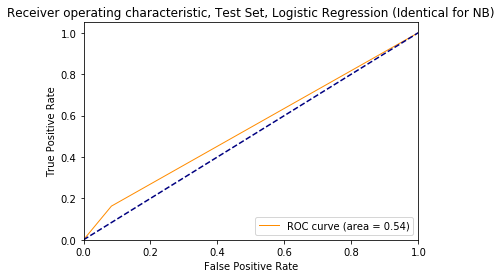

In [14]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(mypredclass, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, Test Set, Logistic Regression (Identical for NB)')
plt.legend(loc="lower right")
plt.show()